Mean Squared Error: 16957.17860820986
R-squared: 0.7721688079336091
Accuracy: 77.22%


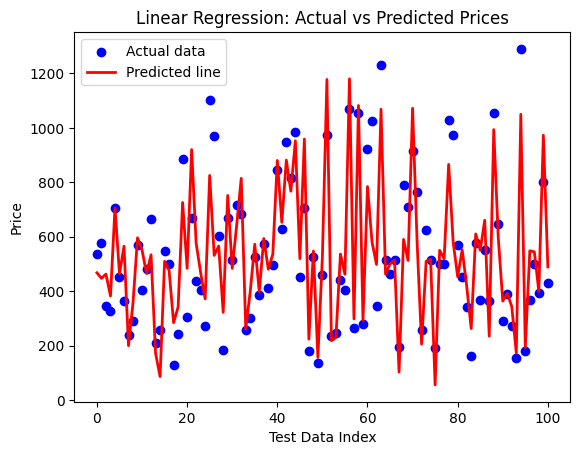

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data
data = pd.read_csv('laptop.csv')

# Clean 'Price' column by removing the currency symbol and converting to numeric
data['Price'] = data['Price(£)'].values

# Features and target variable
X = data.iloc[:, 1:8]  # Features excluding 'id' and 'Price'
y = data[['Price']].values  # Target variable

# One-Hot Encoding for categorical features
categorical_columns = ['ScreenResolution', 'Cpu', 'Gpu', 'OpSys']

# Define the preprocessor with handle_unknown='ignore' for the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Inches', 'Ram', 'Memory']),  # Scaling numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-Hot Encoding with unknown category handling
    ])

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result=model.score(X_test,y_test)
# Output evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print(f'Accuracy: {result*100:.2f}%')
# Plotting the results
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual data')
plt.plot(np.arange(len(y_pred)), y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel('Test Data Index')
plt.ylabel('Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()
